In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [2]:
hotpot = pd.read_csv("C:\\Users\\William.Tang\\OneDrive - Prometric Inc\\Documents\\Kaggle Datasets\\archive (1)\\hotpot.csv")

In [3]:
hotpot.head()

,name,url,star,comment,avg_price,taste,environment,services,recommend
0,蜀城巷子老成都火锅(宜山路店),http://www.dianping.com/shop/110269910,准五星商户,545,122,8.6,8.4,8.5,"蜀城嫩鲜牛肉,毛肚,鸭血"
1,旬野菜日本料理和牛寿喜锅专门店(浦东店),http://www.dianping.com/shop/98281287,五星商户,602,313,8.8,9.1,9.0,"安格斯牛肉寿喜锅,刺身拼盘,澳洲和牛寿喜烧"
2,小肥羊(光启城时尚购物中心店),http://www.dianping.com/shop/72351070,准五星商户,4308,1,9.0,8.9,8.9,"特色羔羊肉,鸳鸯锅,招牌豪气羊肉串"
3,薪火重庆本味火锅,http://www.dianping.com/shop/114858370,准五星商户,128,12,8.4,8.7,8.9,"特色鲜鸭血,豚骨鸳鸯锅,现杀牛蛙"
4,蜀大侠(江宁路店),http://www.dianping.com/shop/98763397,五星商户,1529,133,9.0,9.0,8.9,"贵妃牛肉,大侠水牛毛肚,冰川鹅肠"


In [4]:
hotpot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 749 entries, 0 to 748
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         749 non-null    object 
 1   url          749 non-null    object 
 2   star         749 non-null    object 
 3   comment      749 non-null    int64  
 4   avg_price    749 non-null    int64  
 5   taste        749 non-null    float64
 6   environment  749 non-null    float64
 7   services     749 non-null    float64
 8   recommend    749 non-null    object 
dtypes: float64(3), int64(2), object(4)
memory usage: 52.8+ KB


In [24]:
hotpot['star'].unique()

array(['准五星商户', '五星商户', '四星商户', '准四星商户'], dtype=object)

In [25]:

    
hotpot.loc[(hotpot['star']  == "准五星商户") | (hotpot['star'] == "五星商户"), 'StarNumber'] = 5
hotpot.loc[(hotpot['star'] == "四星商户") | (hotpot['star'] == "准四星商户"), 'StarNumber'] = 4


In [7]:
hotpot.shape[0]

749

In [29]:
hotpot['recommend']
hotpot[['Item 1','Item 2','Item 3']] = hotpot['recommend'].str.split(',',expand=True)

In [30]:
hotpot.head()

,name,url,star,comment,avg_price,taste,environment,services,recommend,StarNumber,Item 1,Item 2,Item 3
0,蜀城巷子老成都火锅(宜山路店),http://www.dianping.com/shop/110269910,准五星商户,545,122,8.6,8.4,8.5,"蜀城嫩鲜牛肉,毛肚,鸭血",5.0,蜀城嫩鲜牛肉,毛肚,鸭血
1,旬野菜日本料理和牛寿喜锅专门店(浦东店),http://www.dianping.com/shop/98281287,五星商户,602,313,8.8,9.1,9.0,"安格斯牛肉寿喜锅,刺身拼盘,澳洲和牛寿喜烧",5.0,安格斯牛肉寿喜锅,刺身拼盘,澳洲和牛寿喜烧
2,小肥羊(光启城时尚购物中心店),http://www.dianping.com/shop/72351070,准五星商户,4308,1,9.0,8.9,8.9,"特色羔羊肉,鸳鸯锅,招牌豪气羊肉串",5.0,特色羔羊肉,鸳鸯锅,招牌豪气羊肉串
3,薪火重庆本味火锅,http://www.dianping.com/shop/114858370,准五星商户,128,12,8.4,8.7,8.9,"特色鲜鸭血,豚骨鸳鸯锅,现杀牛蛙",5.0,特色鲜鸭血,豚骨鸳鸯锅,现杀牛蛙
4,蜀大侠(江宁路店),http://www.dianping.com/shop/98763397,五星商户,1529,133,9.0,9.0,8.9,"贵妃牛肉,大侠水牛毛肚,冰川鹅肠",5.0,贵妃牛肉,大侠水牛毛肚,冰川鹅肠


In [52]:
hotpot = pd.melt(hotpot,id_vars = ['name','avg_price','taste','environment','services','StarNumber'],
        value_vars = ['Item 1','Item 2', 'Item 3'])
#pd.melt(df, id_vars=['A'], value_vars=['B', 'C'])

([<matplotlib.axis.XTick at 0x1dd5a1a79a0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

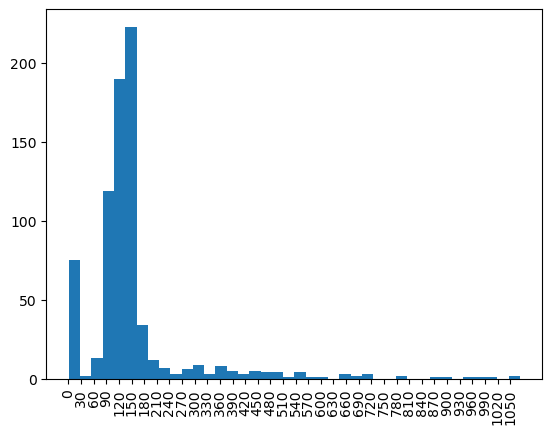

In [50]:
plt.hist(hotpot['avg_price'],bins=40)
plt.xticks(np.arange(0, max(hotpot['avg_price']), 30),rotation = 'vertical')

In [53]:
hotpot.loc[hotpot['avg_price'] > 30]
#average price 30rmb too low

,name,avg_price,taste,environment,services,StarNumber,variable,value
0,蜀城巷子老成都火锅(宜山路店),122,8.6,8.4,8.5,5.0,Item 1,蜀城嫩鲜牛肉
1,旬野菜日本料理和牛寿喜锅专门店(浦东店),313,8.8,9.1,9.0,5.0,Item 1,安格斯牛肉寿喜锅
4,蜀大侠(江宁路店),133,9.0,9.0,8.9,5.0,Item 1,贵妃牛肉
5,蜀大侠火锅(东建路店),136,9.1,9.1,9.0,5.0,Item 1,贵妃牛肉
6,青岛1903,361,9.1,9.2,8.7,5.0,Item 1,ipa青岛啤酒
...,...,...,...,...,...,...,...,...
2242,陈记顺和牛肉店(浙江南路店),129,8.7,8.1,8.3,5.0,Item 3,嫩肉
2243,炉得香双层烤鸭火锅(松江店),103,8.5,8.9,8.8,5.0,Item 3,烤鸭火锅
2244,大头椰(万象城店),141,8.4,9.1,8.8,5.0,Item 3,椰汁饮料
2245,重庆熬家老火锅(金桥太茂店),126,8.7,8.7,8.7,5.0,Item 3,牛油番茄鸳鸯锅


In [136]:
hotpot.head()

,name,avg_price,taste,environment,services,StarNumber,variable,value,valueobject,Meat,Length
0,蜀城巷子老成都火锅(宜山路店),122,8.6,8.4,8.5,5.0,Item 1,蜀城嫩鲜牛肉,蜀城嫩鲜牛肉,False,6
1,旬野菜日本料理和牛寿喜锅专门店(浦东店),313,8.8,9.1,9.0,5.0,Item 1,安格斯牛肉寿喜锅,安格斯牛肉寿喜锅,False,8
2,小肥羊(光启城时尚购物中心店),1,9.0,8.9,8.9,5.0,Item 1,特色羔羊肉,特色羔羊肉,True,5
3,薪火重庆本味火锅,12,8.4,8.7,8.9,5.0,Item 1,特色鲜鸭血,特色鲜鸭血,False,5
4,蜀大侠(江宁路店),133,9.0,9.0,8.9,5.0,Item 1,贵妃牛肉,贵妃牛肉,False,4


In [135]:
hotpot['Length']= hotpot['value'].str.len()

In [96]:
hotpot['value'].str.contains('肉')

0        True
1        True
2        True
3       False
4        True
        ...  
2242     True
2243    False
2244    False
2245    False
2246     True
Name: value, Length: 2247, dtype: bool

In [105]:
hotpot['Meat'] = hotpot['value'].str.contains('羊肉')

In [80]:
hotpot['value'].unique().shape[0]
hotpot['valueobject'] = hotpot['value'].astype(object)

In [58]:
hotpot.corr()
#services rather high correlation with taste + environment
# price low correlation with star number

,avg_price,taste,environment,services,StarNumber
avg_price,1.000000,0.205322,0.248469,0.185482,0.043566
taste,0.205322,1.000000,0.568752,0.703251,0.470407
environment,0.248469,0.568752,1.000000,0.735661,0.367145
services,0.185482,0.703251,0.735661,1.000000,0.495608
StarNumber,0.043566,0.470407,0.367145,0.495608,1.000000


In [106]:
hotpot_Dummy = pd.get_dummies(hotpot['Meat'])

In [137]:
hotpot_Numeric = hotpot[['avg_price','taste','environment','services',"Length"]]
hotpot_Star = hotpot['StarNumber']

hotpot_merged = pd.concat([hotpot_Numeric, hotpot_Dummy], ignore_index=True, sort=False,axis=1)

In [77]:
hotpot_Numeric.shape[0]

2247

In [78]:
hotpot_Star.shape[0]

2247

In [82]:
hotpot_Dummy.shape[0]

2247

In [100]:
hotpot_merged.shape[0]

2247

In [138]:
X_train, X_test, Y_train, Y_test = train_test_split(hotpot_merged, hotpot_Star, test_size = .20, random_state = 40)

regr = linear_model.LinearRegression() # Do not use fit_intercept = False if you have removed 1 column after dummy encoding
regr.fit(X_train, Y_train)
predicted = regr.predict(X_test)

In [139]:
regr.score(X_test, Y_test)

0.2943346001484619